In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from pathlib import Path
from tqdm.auto import tqdm  # For progress bars


In [2]:
# Setup - with more verbose output
print("Setting up...")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

dataset_base = Path("dataset")
print(f"Dataset path: {dataset_base.absolute()}")

Setting up...
Using device: cpu
Dataset path: E:\machinelearningproject\handwrittenDZOreco\dataset


In [3]:

# Verify dataset exists
if not dataset_base.exists():
    raise FileNotFoundError(f"Dataset directory not found at {dataset_base.absolute()}")

# Dataset and DataLoader
class DzongkhaDigitDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.samples = []
        self.transform = transform
        self.classes = sorted([d.name for d in Path(root_dir).iterdir() if d.is_dir()])
        
        print(f"\nLoading data from {root_dir}...")
        for label in tqdm(self.classes, desc="Classes"):
            label_dir = Path(root_dir) / label
            for img_file in label_dir.glob("*"):
                if img_file.is_file():
                    self.samples.append((str(img_file), int(label)))
    
    def __len__(self): return len(self.samples)
    
    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        img = Image.open(img_path).convert('L')
        return self.transform(img) if self.transform else img, label


In [4]:
# Transforms
train_transform = transforms.Compose([
    transforms.RandomRotation(15),
    transforms.RandomAffine(0, scale=(0.9, 1.1)),
    transforms.RandomResizedCrop(64, scale=(0.8, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

val_test_transform = transforms.Compose([
    transforms.Resize(64),
    transforms.CenterCrop(64),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

In [5]:

# Load data with more feedback
print("\nLoading datasets...")
try:
    train_dataset = DzongkhaDigitDataset(dataset_base / "train", train_transform)
    valid_dataset = DzongkhaDigitDataset(dataset_base / "val", val_test_transform)
    test_dataset = DzongkhaDigitDataset(dataset_base / "test", val_test_transform)
except Exception as e:
    print(f"Error loading datasets: {e}")
    raise

print(f"\nDataset sizes:")
print(f"Train: {len(train_dataset)} samples")
print(f"Validation: {len(valid_dataset)} samples")
print(f"Test: {len(test_dataset)} samples")

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)



Loading datasets...

Loading data from dataset\train...


Classes:   0%|          | 0/10 [00:00<?, ?it/s]


Loading data from dataset\val...


Classes:   0%|          | 0/10 [00:00<?, ?it/s]


Loading data from dataset\test...


Classes:   0%|          | 0/10 [00:00<?, ?it/s]


Dataset sizes:
Train: 10500 samples
Validation: 3000 samples
Test: 1500 samples


In [6]:
# Model with feedback
print("\nCreating model...")
def get_resnet18(num_classes=10):
    model = models.resnet18(weights=None)
    model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
    model.fc = nn.Linear(model.fc.in_features, num_classes)
    return model

model = get_resnet18().to(device)
print(model)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)


Creating model...
ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): Re

Setting up...
Using device: cpu
Dataset path: E:\machinelearningproject\handwrittenDZOreco\dataset

Loading datasets...

Loading data from dataset\train...


Classes:   0%|          | 0/10 [00:00<?, ?it/s]


Loading data from dataset\val...


Classes:   0%|          | 0/10 [00:00<?, ?it/s]


Loading data from dataset\test...


Classes:   0%|          | 0/10 [00:00<?, ?it/s]


Dataset sizes:
Train: 10500 samples
Validation: 3000 samples
Test: 1500 samples

Creating model...
ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64,

Epoch 1/5 [Train]:   0%|          | 0/329 [00:00<?, ?it/s]

Epoch 1/5 [Val]:   0%|          | 0/94 [00:00<?, ?it/s]

New best model saved with val_acc: 96.17%
Train Loss: 0.3874 | Train Acc: 89.12% | Val Acc: 96.17%


Epoch 2/5 [Train]:   0%|          | 0/329 [00:00<?, ?it/s]

Epoch 2/5 [Val]:   0%|          | 0/94 [00:00<?, ?it/s]

New best model saved with val_acc: 96.73%
Train Loss: 0.0991 | Train Acc: 96.90% | Val Acc: 96.73%


Epoch 3/5 [Train]:   0%|          | 0/329 [00:00<?, ?it/s]

Epoch 3/5 [Val]:   0%|          | 0/94 [00:00<?, ?it/s]

New best model saved with val_acc: 97.80%
Train Loss: 0.0649 | Train Acc: 97.99% | Val Acc: 97.80%


Epoch 4/5 [Train]:   0%|          | 0/329 [00:00<?, ?it/s]

Epoch 4/5 [Val]:   0%|          | 0/94 [00:00<?, ?it/s]

New best model saved with val_acc: 98.27%
Train Loss: 0.0525 | Train Acc: 98.44% | Val Acc: 98.27%


Epoch 5/5 [Train]:   0%|          | 0/329 [00:00<?, ?it/s]

Epoch 5/5 [Val]:   0%|          | 0/94 [00:00<?, ?it/s]

Train Loss: 0.0405 | Train Acc: 98.92% | Val Acc: 98.10%

Evaluating on test set...


Testing:   0%|          | 0/47 [00:00<?, ?it/s]


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       150
           1       0.94      1.00      0.97       150
           2       0.97      0.95      0.96       150
           3       0.98      0.96      0.97       150
           4       0.99      0.96      0.98       150
           5       0.95      0.99      0.97       150
           6       0.99      0.98      0.99       150
           7       0.99      0.98      0.99       150
           8       0.99      0.99      0.99       150
           9       0.97      0.99      0.98       150

    accuracy                           0.98      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500



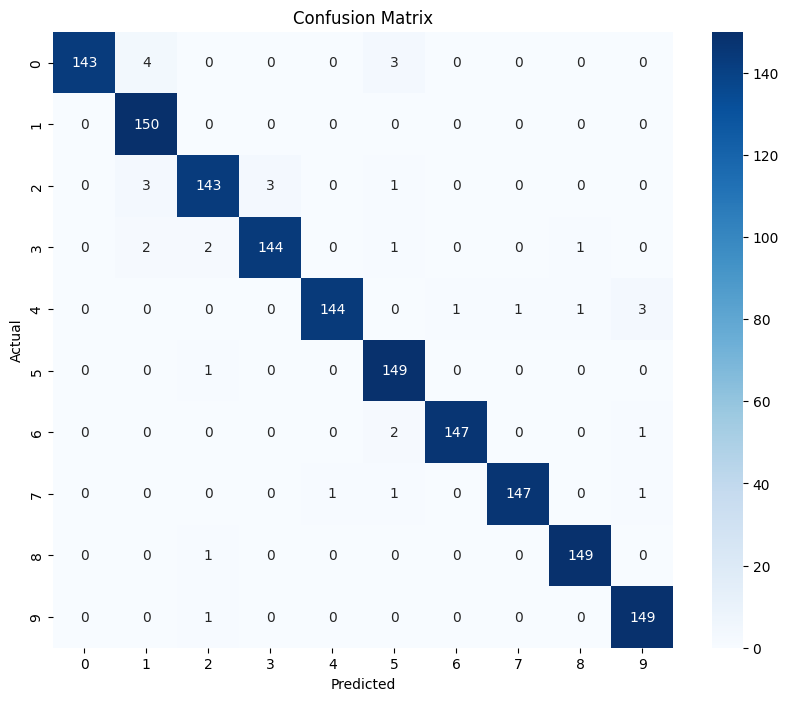


Model saved as model.h5


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from pathlib import Path
from tqdm.auto import tqdm  # For progress bars

# Setup - with more verbose output
print("Setting up...")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

dataset_base = Path("dataset")
print(f"Dataset path: {dataset_base.absolute()}")

# Verify dataset exists
if not dataset_base.exists():
    raise FileNotFoundError(f"Dataset directory not found at {dataset_base.absolute()}")

# Dataset and DataLoader
class DzongkhaDigitDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.samples = []
        self.transform = transform
        self.classes = sorted([d.name for d in Path(root_dir).iterdir() if d.is_dir()])
        
        print(f"\nLoading data from {root_dir}...")
        for label in tqdm(self.classes, desc="Classes"):
            label_dir = Path(root_dir) / label
            for img_file in label_dir.glob("*"):
                if img_file.is_file():
                    self.samples.append((str(img_file), int(label)))
    
    def __len__(self): return len(self.samples)
    
    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        img = Image.open(img_path).convert('L')
        return self.transform(img) if self.transform else img, label

# Transforms
train_transform = transforms.Compose([
    transforms.RandomRotation(15),
    transforms.RandomAffine(0, scale=(0.9, 1.1)),
    transforms.RandomResizedCrop(64, scale=(0.8, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

val_test_transform = transforms.Compose([
    transforms.Resize(64),
    transforms.CenterCrop(64),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Load data with more feedback
print("\nLoading datasets...")
try:
    train_dataset = DzongkhaDigitDataset(dataset_base / "train", train_transform)
    valid_dataset = DzongkhaDigitDataset(dataset_base / "val", val_test_transform)
    test_dataset = DzongkhaDigitDataset(dataset_base / "test", val_test_transform)
except Exception as e:
    print(f"Error loading datasets: {e}")
    raise

print(f"\nDataset sizes:")
print(f"Train: {len(train_dataset)} samples")
print(f"Validation: {len(valid_dataset)} samples")
print(f"Test: {len(test_dataset)} samples")

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Model with feedback
print("\nCreating model...")
def get_resnet18(num_classes=10):
    model = models.resnet18(weights=None)
    model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
    model.fc = nn.Linear(model.fc.in_features, num_classes)
    return model

model = get_resnet18().to(device)
print(model)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Training with progress bars
def train_validate(model, train_loader, valid_loader, criterion, optimizer, epochs=10):
    best_acc = 0
    history = {'train': {'loss': [], 'acc': []}, 'val': {'loss': [], 'acc': []}}
    
    for epoch in range(epochs):
        # Training
        model.train()
        train_loss, correct, total = 0, 0, 0
        for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs} [Train]"):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
        
        train_acc = 100 * correct / total
        history['train']['loss'].append(train_loss/len(train_loader))
        history['train']['acc'].append(train_acc)
        
        # Validation
        val_loss, correct, total = 0, 0, 0
        model.eval()
        with torch.no_grad():
            for inputs, labels in tqdm(valid_loader, desc=f"Epoch {epoch+1}/{epochs} [Val]"):
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                val_loss += criterion(outputs, labels).item()
                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()
        
        val_acc = 100 * correct / total
        history['val']['loss'].append(val_loss/len(valid_loader))
        history['val']['acc'].append(val_acc)
        
        # Save best model
        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(model.state_dict(), 'best_model.pth')
            print(f"New best model saved with val_acc: {val_acc:.2f}%")
        
        print(f'Train Loss: {history["train"]["loss"][-1]:.4f} | Train Acc: {train_acc:.2f}% | Val Acc: {val_acc:.2f}%')
    
    return history

print("\nStarting training...")
history = train_validate(model, train_loader, valid_loader, criterion, optimizer, 5)  # Reduced epochs for testing

# Evaluation
print("\nEvaluating on test set...")
model.load_state_dict(torch.load('best_model.pth'))
model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for inputs, labels in tqdm(test_loader, desc="Testing"):
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = outputs.max(1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Metrics
print("\nClassification Report:")
print(classification_report(all_labels, all_preds))

# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(all_labels, all_preds), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Save model
torch.save(model.state_dict(), 'model.h5')
print("\nModel saved as model.h5")